### Purpose of this notebook

- Generate a bunch of worlds and analyze their relational properties to help identify which are interesting, and to measure those properties in the population


In [5]:
from __future__ import division

import numpy as np
import os, sys
from PIL import Image

from matplotlib import pylab, mlab, pyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

from IPython.core.pylabtools import figsize, getfigs

import seaborn as sns

import random

from scipy.stats import norm
from IPython.display import clear_output

import copy
import importlib


### Add Paths

## root paths
curr_dir = os.getcwd()
proj_dir = os.path.abspath(os.path.join(curr_dir,'..','..')) ## use relative paths

## add helpers to python path
import sys
if os.path.join(proj_dir, 'stimuli') not in sys.path:
    sys.path.append(os.path.join(proj_dir, 'stimuli'))

## custom helper modules
import separation_axis_theorem as sat
import blockworld_helpers as utils

### sample single random world and render it inline

In [101]:
## helpers
def jenga_blocks(w,n):

    for j in range(0,n):
        i = 0;
        block_removed = False
        while not block_removed:
            #block_number = random_block_order.pop
            (block_removed, w2) = w.jenga_block(i)
            if block_removed:
                w = w2
            else:
                i += 1;
    return w

In [181]:
## sample random world and save to JSON
importlib.reload(utils)
_w = utils.World()
_w.fill_world()
block_dict = _w.get_block_dict()

## build world from JSON
w = utils.World()
w.populate_from_block_dict(block_dict)

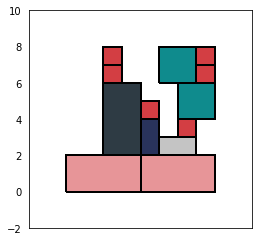

Area filled = 42
Num blocks = 13
Timestamp = 1569956310
Stable? TODO


In [210]:
## sample random world and save to JSON
importlib.reload(utils)
_w = utils.World()
_w.fill_world()
block_dict = _w.get_block_dict() 

## build world from JSON
w = utils.World()
w.populate_from_block_dict(block_dict)

## remove some blocks to sparsify world
w2 = jenga_blocks(w,10)
utils.draw_world(w2)

area_filled = np.sum(w2.block_map)
num_blocks = len(w2.blocks)
import datetime
timestamp = np.int(datetime.datetime.now().timestamp())
print('Area filled = {}'.format(area_filled))
print('Num blocks = {}'.format(num_blocks))
print('Timestamp = {}'.format(timestamp))
print('Stable? TODO') ## insert stability check here

In [202]:
def save_world_json(block_dict, 
               path_to_dump = './sampled_worlds_json'):
    '''
    write JSON representation of block world to file
    '''
    ## compute simple attributes to append to filename: total_area, num_blocks, timestamp
    total_area = 0
    for block in block_dict['blocks']:
        total_area += (block['height'] * block['width'])
    num_blocks = len(block_dict['blocks'])    
    timestamp = np.int(datetime.datetime.now().timestamp())
    ## now write to file
    if not os.path.exists(path_to_dump):
        os.makedirs(path_to_dump)
    with open(os.path.join(path_to_dump,'blockworld_area{}_num{}_time{}.js'.format(total_area,num_blocks,timestamp)), 'w') as fout:
         json.dump(block_dict, fout)  
    return block_dict
    
def save_world_render(block_dict,
                   path_to_dump = './sampled_worlds_render'):
    '''
    write image rendering of block world to file
    '''
    ## build world from JSON
    w = utils.World()
    w.populate_from_block_dict(block_dict)
    
    utils.draw_world()
    plt.savefig()
    
    

In [205]:
utils.draw_

In [206]:
block_dict = save_world(block_dict)

In [207]:
block_dict

{'blocks': [{'x': 0, 'y': 0, 'height': 2, 'width': 8},
  {'x': 0, 'y': 2, 'height': 1, 'width': 1},
  {'x': 1, 'y': 2, 'height': 4, 'width': 2},
  {'x': 3, 'y': 2, 'height': 1, 'width': 1},
  {'x': 4, 'y': 2, 'height': 2, 'width': 4},
  {'x': 0, 'y': 3, 'height': 2, 'width': 1},
  {'x': 3, 'y': 3, 'height': 1, 'width': 1},
  {'x': 3, 'y': 4, 'height': 2, 'width': 1},
  {'x': 4, 'y': 4, 'height': 2, 'width': 4},
  {'x': 0, 'y': 5, 'height': 1, 'width': 1},
  {'x': 0, 'y': 6, 'height': 1, 'width': 2},
  {'x': 2, 'y': 6, 'height': 1, 'width': 2},
  {'x': 4, 'y': 6, 'height': 1, 'width': 1},
  {'x': 5, 'y': 6, 'height': 2, 'width': 1},
  {'x': 6, 'y': 6, 'height': 1, 'width': 1},
  {'x': 7, 'y': 6, 'height': 1, 'width': 1},
  {'x': 0, 'y': 7, 'height': 1, 'width': 1},
  {'x': 1, 'y': 7, 'height': 1, 'width': 2},
  {'x': 3, 'y': 7, 'height': 1, 'width': 1},
  {'x': 4, 'y': 7, 'height': 1, 'width': 1},
  {'x': 6, 'y': 7, 'height': 1, 'width': 1},
  {'x': 7, 'y': 7, 'height': 1, 'width': 1}]}

In [139]:
def save_to_json(self):
    import json
    ## create block dictionary with most essential properties
    block_list = []
    for i,this_block in enumerate(self.blocks):
        newdict = dict()
        olddict = vars(self.blocks[i])
        for (key,value) in olddict.items():
            if key in['x','y','width','height']:
                newdict[key] = value
        block_list.append(newdict)
    block_dict = {"blocks": block_list}
    
    ## write to file
    path_to_dump = './sampled_worlds'
    if not os.path.exists(path_to_dump):
        os.makedirs(path_to_dump)
    with open(os.path.join(path_to_dump,'blockworld_area{}_num{}_time{}.js'.format(area_filled,num_blocks,timestamp)), 'w') as fout:
         json.dump(block_dict, fout)    


In [190]:
total_area = 0
for block in block_dict['blocks']:
    total_area += (block['height'] * block['width'])

In [193]:
len(block_dict['blocks'])

20

In [158]:
block_list = []
for i,this_block in enumerate(w2.blocks):
    newdict = dict()
    olddict = vars(w2.blocks[i])
    for (key,value) in olddict.items():
        if key in['x','y','width','height']:
            newdict[key] = value
    block_list.append(newdict)
block_dict = {"blocks":block_list}

In [160]:
## will-curated block structures
w1 = {"blocks": [{"width": 4, "height": 2, "x": 0, "y": 0}, {"width": 4, "height": 2, "x": 4, "y": 0}, {"width": 2, "height": 4, "x": 0, "y": 2}, {"width": 4, "height": 2, "x": 3, "y": 2}, {"width": 4, "height": 2, "x": 2, "y": 4}, {"width": 2, "height": 1, "x": 6, "y": 4}, {"width": 1, "height": 1, "x": 6, "y": 5}, {"width": 1, "height": 2, "x": 7, "y": 5}, {"width": 1, "height": 1, "x": 0, "y": 6}, {"width": 2, "height": 2, "x": 3, "y": 6}, {"width": 1, "height": 1, "x": 5, "y": 6}, {"width": 1, "height": 2, "x": 6, "y": 6}, {"width": 1, "height": 1, "x": 0, "y": 7}, {"width": 1, "height": 1, "x": 5, "y": 7}, {"width": 1, "height": 1, "x": 7, "y": 7}]}
w2 ={"blocks": [{"width": 2, "height": 4, "x": 0, "y": 0}, {"width": 4, "height": 4, "x": 3, "y": 0}, {"width": 1, "height": 2, "x": 7, "y": 0}, {"width": 1, "height": 1, "x": 7, "y": 2}, {"width": 1, "height": 1, "x": 7, "y": 3}, {"width": 2, "height": 2, "x": 0, "y": 4}, {"width": 4, "height": 2, "x": 2, "y": 4}, {"width": 1, "height": 2, "x": 6, "y": 4}, {"width": 1, "height": 1, "x": 7, "y": 4}, {"width": 1, "height": 2, "x": 7, "y": 5}, {"width": 1, "height": 1, "x": 0, "y": 6}, {"width": 1, "height": 1, "x": 5, "y": 6}, {"width": 1, "height": 1, "x": 0, "y": 7}, {"width": 1, "height": 1, "x": 5, "y": 7}, {"width": 1, "height": 1, "x": 7, "y": 7}]}
w3 = {"blocks": [{"width": 2, "height": 1, "x": 1, "y": 0}, {"width": 1, "height": 2, "x": 5, "y": 0}, {"width": 2, "height": 4, "x": 6, "y": 0}, {"width": 2, "height": 1, "x": 1, "y": 1}, {"width": 4, "height": 4, "x": 0, "y": 2}, {"width": 2, "height": 1, "x": 4, "y": 2}, {"width": 2, "height": 4, "x": 4, "y": 3}, {"width": 2, "height": 1, "x": 6, "y": 4}, {"width": 1, "height": 2, "x": 7, "y": 5}, {"width": 1, "height": 1, "x": 4, "y": 7}, {"width": 2, "height": 1, "x": 5, "y": 7}, {"width": 1, "height": 1, "x": 7, "y": 7}]}
w4 = {"blocks": [{"width": 4, "height": 2, "x": 1, "y": 0}, {"width": 2, "height": 1, "x": 5, "y": 0}, {"width": 1, "height": 2, "x": 7, "y": 0}, {"width": 2, "height": 1, "x": 5, "y": 1}, {"width": 4, "height": 2, "x": 0, "y": 2}, {"width": 1, "height": 1, "x": 6, "y": 2}, {"width": 1, "height": 2, "x": 7, "y": 2}, {"width": 1, "height": 2, "x": 6, "y": 3}, {"width": 4, "height": 2, "x": 0, "y": 4}, {"width": 1, "height": 1, "x": 7, "y": 4}, {"width": 4, "height": 2, "x": 4, "y": 5}, {"width": 1, "height": 1, "x": 0, "y": 6}, {"width": 2, "height": 2, "x": 1, "y": 6}, {"width": 1, "height": 1, "x": 3, "y": 6}, {"width": 1, "height": 1, "x": 0, "y": 7}, {"width": 2, "height": 1, "x": 3, "y": 7}, {"width": 2, "height": 1, "x": 5, "y": 7}, {"width": 1, "height": 1, "x": 7, "y": 7}]}
w5 = {"blocks": [{"width": 4, "height": 4, "x": 0, "y": 0}, {"width": 1, "height": 2, "x": 4, "y": 0}, {"width": 1, "height": 2, "x": 7, "y": 0}, {"width": 1, "height": 2, "x": 4, "y": 2}, {"width": 1, "height": 2, "x": 7, "y": 2}, {"width": 2, "height": 1, "x": 0, "y": 4}, {"width": 4, "height": 2, "x": 4, "y": 4}, {"width": 1, "height": 2, "x": 0, "y": 5}, {"width": 1, "height": 1, "x": 4, "y": 6}, {"width": 1, "height": 2, "x": 5, "y": 6}, {"width": 2, "height": 1, "x": 6, "y": 6}, {"width": 1, "height": 1, "x": 0, "y": 7}, {"width": 1, "height": 1, "x": 4, "y": 7}, {"width": 1, "height": 1, "x": 6, "y": 7}, {"width": 1, "height": 1, "x": 7, "y": 7}]}
w6 = {"blocks": [{"width": 2, "height": 2, "x": 1, "y": 0}, {"width": 1, "height": 1, "x": 5, "y": 0}, {"width": 2, "height": 4, "x": 6, "y": 0}, {"width": 1, "height": 1, "x": 5, "y": 1}, {"width": 4, "height": 2, "x": 0, "y": 2}, {"width": 4, "height": 2, "x": 0, "y": 4}, {"width": 2, "height": 1, "x": 5, "y": 4}, {"width": 1, "height": 2, "x": 7, "y": 4}, {"width": 2, "height": 1, "x": 5, "y": 5}, {"width": 4, "height": 2, "x": 0, "y": 6}, {"width": 2, "height": 1, "x": 4, "y": 6}, {"width": 1, "height": 2, "x": 6, "y": 6}, {"width": 1, "height": 2, "x": 7, "y": 6}, {"width": 2, "height": 1, "x": 4, "y": 7}]}
w7 = {"blocks": [{"width": 2, "height": 4, "x": 0, "y": 0}, {"width": 2, "height": 1, "x": 3, "y": 0}, {"width": 1, "height": 2, "x": 6, "y": 0}, {"width": 1, "height": 2, "x": 7, "y": 0}, {"width": 4, "height": 4, "x": 2, "y": 1}, {"width": 1, "height": 2, "x": 6, "y": 2}, {"width": 1, "height": 2, "x": 7, "y": 2}, {"width": 1, "height": 1, "x": 1, "y": 4}, {"width": 1, "height": 2, "x": 6, "y": 4}, {"width": 1, "height": 1, "x": 7, "y": 4}, {"width": 2, "height": 2, "x": 0, "y": 5}, {"width": 2, "height": 2, "x": 2, "y": 5}, {"width": 1, "height": 1, "x": 5, "y": 5}, {"width": 1, "height": 2, "x": 7, "y": 5}, {"width": 2, "height": 2, "x": 4, "y": 6}, {"width": 1, "height": 1, "x": 6, "y": 6}, {"width": 2, "height": 1, "x": 0, "y": 7}, {"width": 2, "height": 1, "x": 2, "y": 7}, {"width": 2, "height": 1, "x": 6, "y": 7}]}
w8 = {"blocks": [{"width": 2, "height": 4, "x": 0, "y": 0}, {"width": 4, "height": 2, "x": 2, "y": 0}, {"width": 2, "height": 4, "x": 6, "y": 0}, {"width": 1, "height": 2, "x": 3, "y": 2}, {"width": 2, "height": 2, "x": 2, "y": 4}, {"width": 1, "height": 1, "x": 6, "y": 4}, {"width": 1, "height": 2, "x": 7, "y": 4}, {"width": 1, "height": 1, "x": 6, "y": 5}, {"width": 8, "height": 2, "x": 0, "y": 6}]}
w9 ={"blocks": [{"width": 1, "height": 1, "x": 1, "y": 0}, {"width": 4, "height": 2, "x": 3, "y": 0}, {"width": 1, "height": 1, "x": 7, "y": 0}, {"width": 2, "height": 2, "x": 0, "y": 1}, {"width": 1, "height": 2, "x": 7, "y": 1}, {"width": 4, "height": 4, "x": 2, "y": 2}, {"width": 1, "height": 1, "x": 1, "y": 3}, {"width": 1, "height": 2, "x": 7, "y": 3}, {"width": 1, "height": 1, "x": 1, "y": 4}, {"width": 2, "height": 1, "x": 0, "y": 5}, {"width": 1, "height": 1, "x": 7, "y": 5}, {"width": 4, "height": 2, "x": 0, "y": 6}, {"width": 1, "height": 1, "x": 4, "y": 6}, {"width": 2, "height": 2, "x": 5, "y": 6}, {"width": 1, "height": 2, "x": 7, "y": 6}, {"width": 1, "height": 1, "x": 4, "y": 7}]}
w10 = {"blocks": [{"width": 1, "height": 1, "x": 0, "y": 0}, {"width": 2, "height": 4, "x": 5, "y": 0}, {"width": 1, "height": 1, "x": 7, "y": 0}, {"width": 1, "height": 1, "x": 0, "y": 1}, {"width": 1, "height": 1, "x": 7, "y": 1}, {"width": 1, "height": 2, "x": 0, "y": 2}, {"width": 1, "height": 1, "x": 7, "y": 2}, {"width": 1, "height": 1, "x": 7, "y": 3}, {"width": 8, "height": 2, "x": 0, "y": 4}, {"width": 2, "height": 1, "x": 2, "y": 6}, {"width": 2, "height": 1, "x": 6, "y": 6}, {"width": 2, "height": 1, "x": 1, "y": 7}, {"width": 1, "height": 1, "x": 3, "y": 7}, {"width": 1, "height": 1, "x": 6, "y": 7}, {"width": 1, "height": 1, "x": 7, "y": 7}]}
w11 = {"blocks": [{"width": 4, "height": 2, "x": 0, "y": 0}, {"width": 2, "height": 1, "x": 5, "y": 0}, {"width": 4, "height": 2, "x": 4, "y": 1}, {"width": 2, "height": 1, "x": 0, "y": 2}, {"width": 1, "height": 2, "x": 3, "y": 2}, {"width": 1, "height": 1, "x": 0, "y": 3}, {"width": 4, "height": 2, "x": 4, "y": 3}, {"width": 1, "height": 1, "x": 3, "y": 4}, {"width": 8, "height": 2, "x": 0, "y": 5}, {"width": 2, "height": 1, "x": 0, "y": 7}, {"width": 1, "height": 1, "x": 2, "y": 7}, {"width": 2, "height": 1, "x": 3, "y": 7}, {"width": 1, "height": 1, "x": 5, "y": 7}, {"width": 1, "height": 1, "x": 6, "y": 7}, {"width": 1, "height": 1, "x": 7, "y": 7}]}
w12 = {"blocks": [{"width": 2, "height": 2, "x": 0, "y": 0}, {"width": 4, "height": 2, "x": 2, "y": 0}, {"width": 2, "height": 4, "x": 6, "y": 0}, {"width": 2, "height": 1, "x": 0, "y": 2}, {"width": 2, "height": 2, "x": 3, "y": 2}, {"width": 2, "height": 4, "x": 0, "y": 3}, {"width": 4, "height": 2, "x": 2, "y": 4}, {"width": 2, "height": 2, "x": 6, "y": 4}, {"width": 2, "height": 1, "x": 3, "y": 6}, {"width": 2, "height": 1, "x": 0, "y": 7}, {"width": 2, "height": 1, "x": 3, "y": 7}]}

In [162]:
import json
path_to_dump = './sampled_worlds'
if not os.path.exists(path_to_dump):
    os.makedirs(path_to_dump)
with open(os.path.join(path_to_dump,'blockworld_area{}_num{}.js'.format(area_filled,num_blocks)), 'w') as fout:
     json.dump(block_dict, fout)

In [167]:
J = json.loads(open(os.path.join(path_to_dump,'blockworld_area{}_num{}.js'.format(area_filled,num_blocks)),mode='r').read())


In [168]:
J

{'blocks': [{'x': 0, 'y': 0, 'height': 2, 'width': 8},
  {'x': 4, 'y': 2, 'height': 2, 'width': 4},
  {'x': 4, 'y': 4, 'height': 2, 'width': 4},
  {'x': 5, 'y': 6, 'height': 1, 'width': 2},
  {'x': 6, 'y': 7, 'height': 1, 'width': 1}]}

'{"blocks": [{"width": 8, "height": 2, "x": 0, "y": 0}, {"width": 4, "height": 2, "x": 0, "y": 2}, {"width": 4, "height": 2, "x": 4, "y": 2}, {"width": 4, "height": 2, "x": 0, "y": 4}, {"width": 4, "height": 2, "x": 4, "y": 4}, {"width": 2, "height": 2, "x": 0, "y": 6}, {"width": 1, "height": 2, "x": 2, "y": 6}, {"width": 1, "height": 1, "x": 3, "y": 6}, {"width": 1, "height": 1, "x": 4, "y": 6}, {"width": 2, "height": 1, "x": 5, "y": 6}, {"width": 1, "height": 2, "x": 7, "y": 6}, {"width": 1, "height": 1, "x": 3, "y": 7}, {"width": 1, "height": 1, "x": 4, "y": 7}, {"width": 1, "height": 1, "x": 5, "y": 7}, {"width": 1, "height": 1, "x": 6, "y": 7}]}'

### extract relational representation

In [132]:
importlib.reload(utils)

block_array_x = np.array(w2.blocks)[None,:]
block_array_y = np.array(w2.blocks)[:,None]

above_function = np.vectorize(utils.Block.above)
aboves = above_function(block_array_x, block_array_y)

below_function = np.vectorize(utils.Block.below)
belows = below_function(block_array_x, block_array_y)

leftof_function = np.vectorize(utils.Block.leftof)
leftofs = leftof_function(block_array_x, block_array_y)

rightof_function = np.vectorize(utils.Block.rightof)
rightofs = rightof_function(block_array_x, block_array_y)

sidestouch_function = np.vectorize(utils.Block.sides_touch)
sidestouches = sidestouch_function(block_array_x, block_array_y)

verticaltouch_function = np.vectorize(utils.Block.vertical_touch)
verticaltouches = verticaltouch_function(block_array_x, block_array_y)

absoverlap_function = np.vectorize(utils.Block.abs_overlap)
absoverlaps = absoverlap_function(block_array_x, block_array_y)

completesupport_function = np.vectorize(utils.Block.completely_supported_by)
completesupports = completesupport_function(block_array_x, block_array_y)

partialsupport_function = np.vectorize(utils.Block.partially_supported_by)
partialsupports = partialsupport_function(block_array_x, block_array_y)

In [133]:
R = np.stack((aboves,belows,leftofs,rightofs,sidestouches,verticaltouches,completesupports,partialsupports),axis=2)

In [134]:
R.shape

(6, 6, 8)

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False]],

       [[False, False,  True, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [ True, False, False, ...,  True, False,  True],
        ...,
        [ True, False,  True, ..., False, False, False],
        [ True, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False]],

       [[False, False,  True, ..., False, False, False],
        [False,  True, False, ...,  True, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True, False, False, ..., False, False, False],
        [ True, False, False, ..., False, Fal